In [156]:
import numpy as np
import matplotlib.pyplot as plt
import os
import networkx as nx
import random
from mpl_toolkits import mplot3d
import math
import copy
from statistics import mean 
from datetime import datetime

In [144]:
def simulationAlgorithm(n, c, a, start, targets):
    for i in range(start,n):
        previous = []
        for j in range(c):
            #generate random number
            r = random.random()
            #choose next target
            if r < c/(c+a):
                #pick random target
                index = random.randint(0,len(targets)-1)
                vertex = targets[index]
                while vertex in previous:
                    index = random.randint(0,len(targets)-1)
                    vertex = targets[index]
            else:
                #pick random vertex
                vertex = random.randint(0,i-1)
                while vertex in previous:
                    vertex = random.randint(0,i-1)
            #create a link and add to the target list
            targets.append(vertex)
    return targets

In [205]:
def graphCCDF(targets, n, a):
    counts = [0 for i in range(n)]
    for i in targets:
        counts[i] += 1
    #print(counts)
    
    maxC = max(counts)
    bins = [0 for i in range(maxC)]
    for c in counts:
        for i in range(c):
            bins[i] += 1
    s = max(bins)
    bins[:] = [x / s for x in bins]
    #print(bins)
    
    plt.plot(range(maxC),bins,label="a="+str(a))

In [201]:
c = 3
n = 10**6
r = [1,2,3,4]
plt.figure(figsize=(7,7))
for a in r:
    targets = [0,0,1,0,2,1,3,0,2,4]
    simulationAlgorithm(n,c,a,6,targets)
    graphCCDF(targets, n, a)
plt.xscale('log')
plt.yscale('log')
plt.title("CCF for network in-degree")
plt.ylabel("Probability of degree less than or equal to k")
plt.xlabel("in degree k")
plt.legend()
plt.savefig("CDF_overlay.png")

KeyboardInterrupt: 

<Figure size 504x504 with 0 Axes>

C:\Users\cassi\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


81.36160590000004
0.18727309999999991


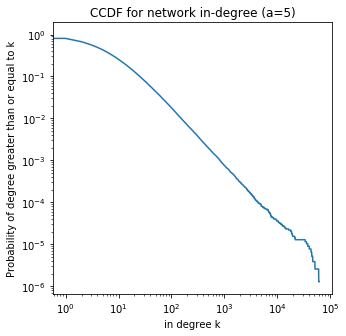

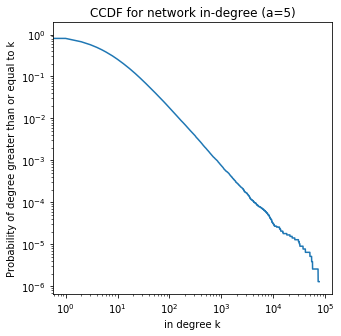

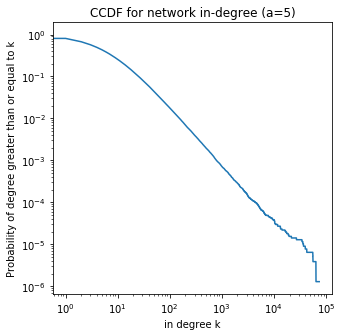

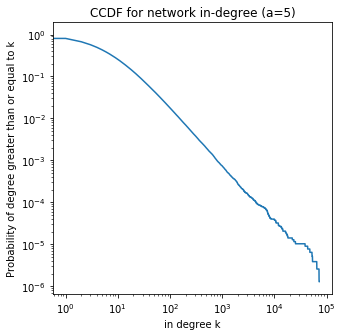

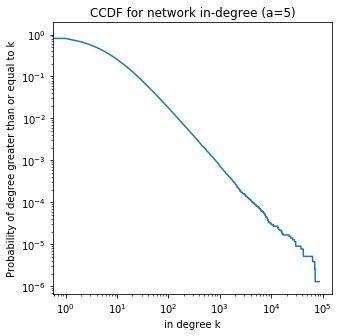

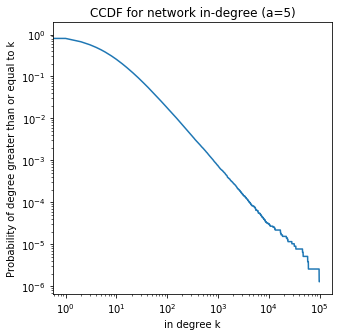

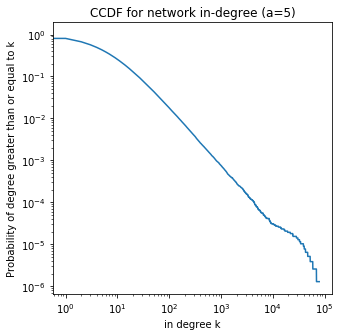

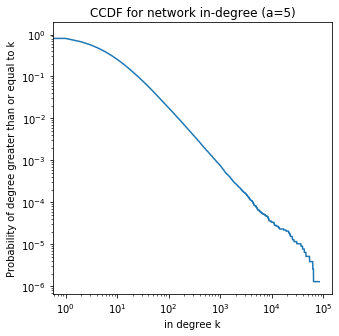

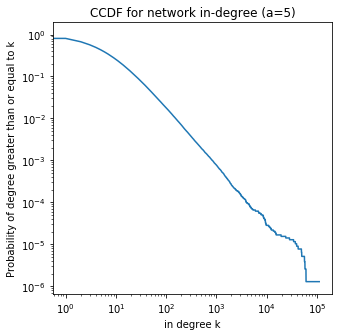

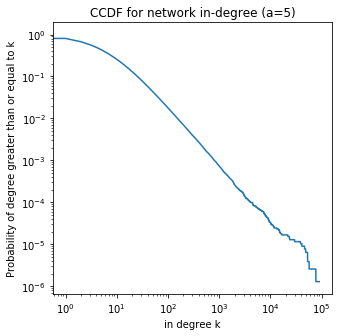

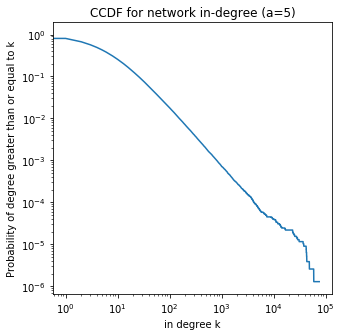

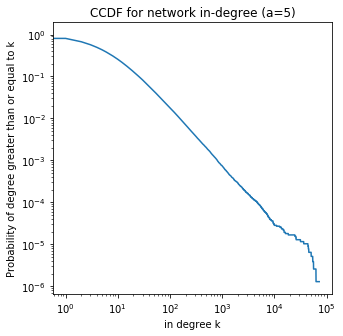

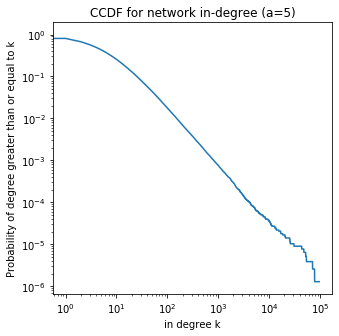

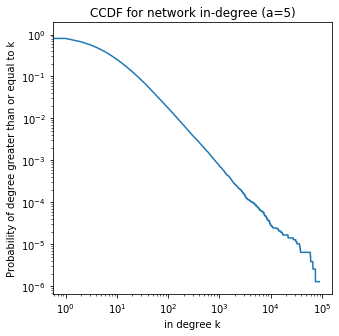

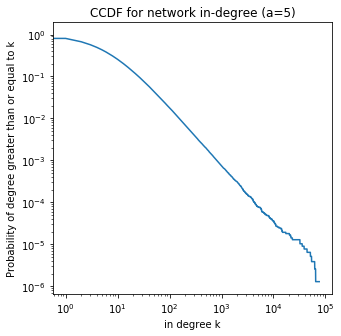

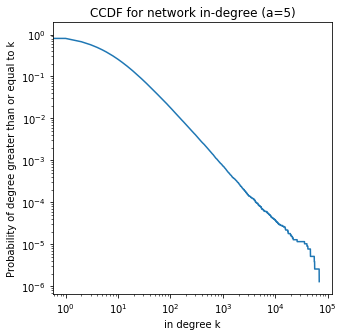

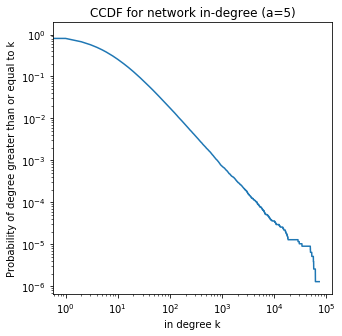

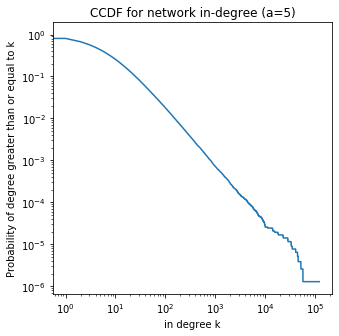

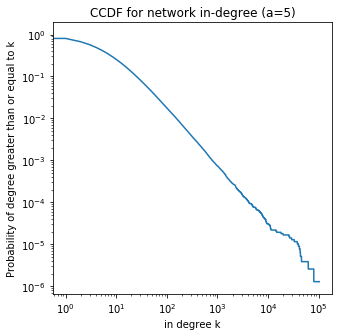

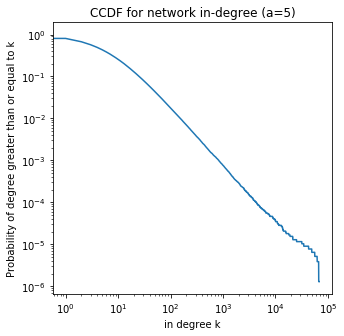

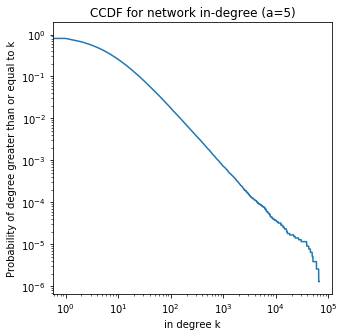

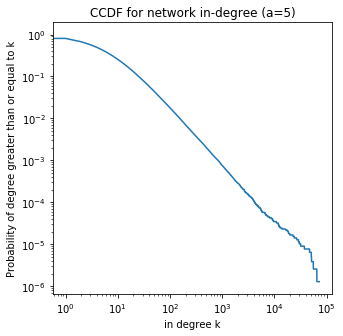

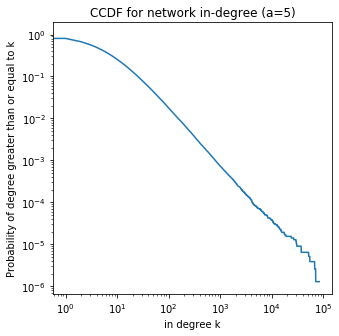

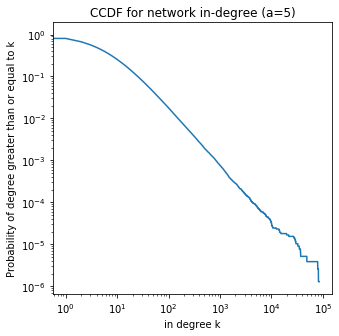

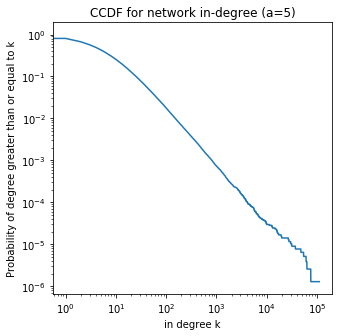

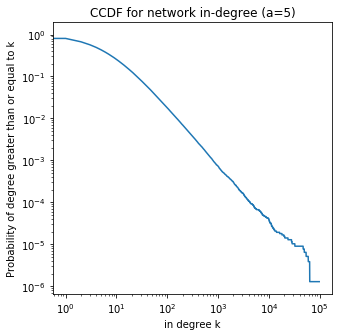

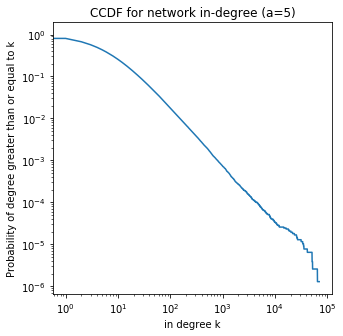

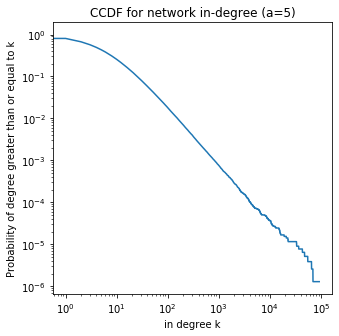

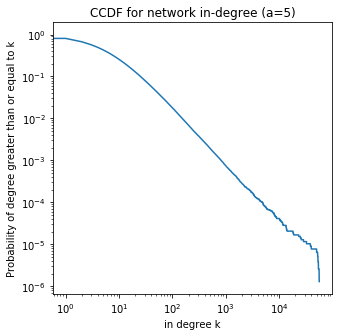

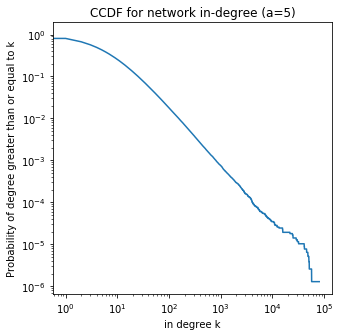

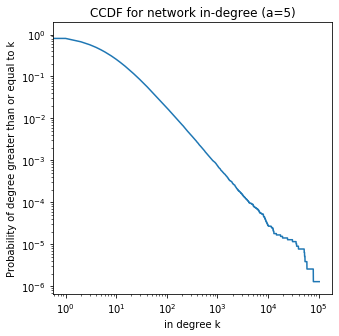

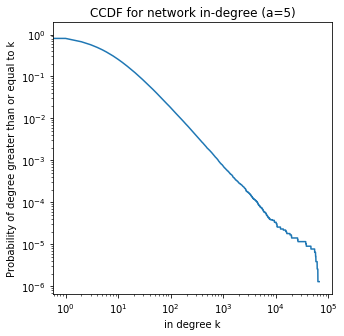

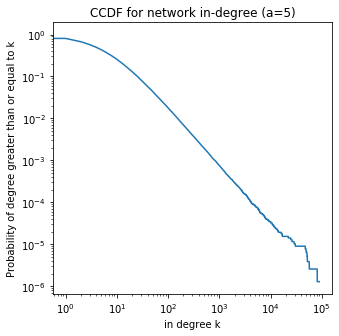

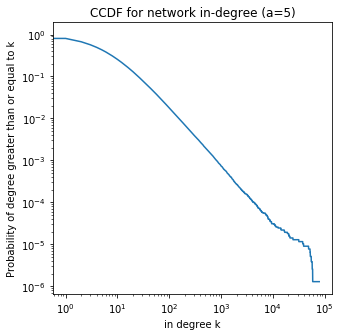

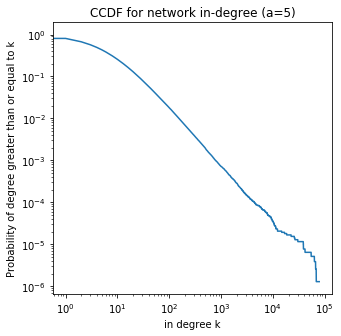

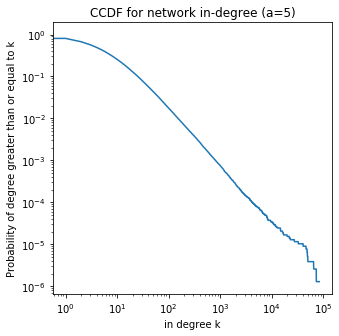

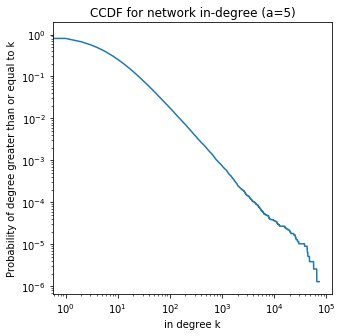

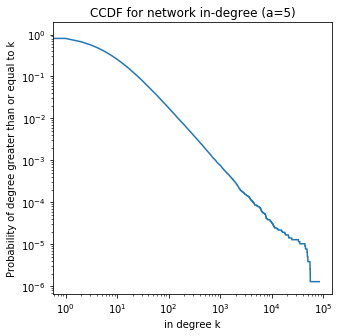

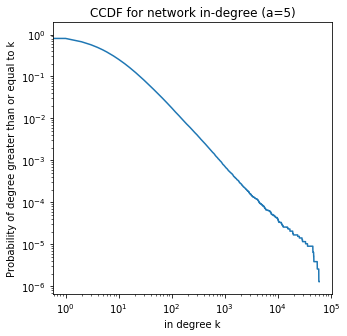

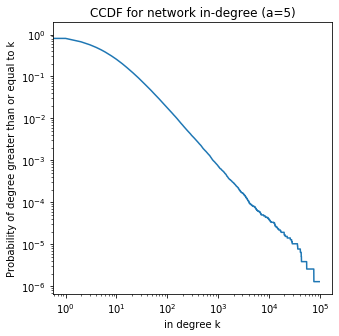

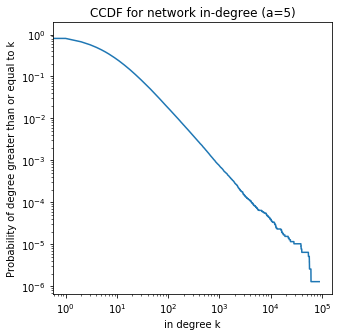

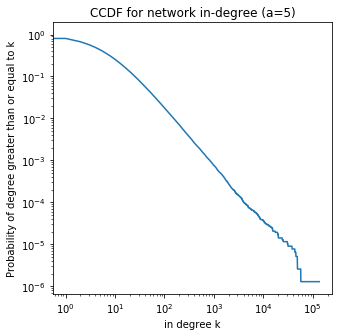

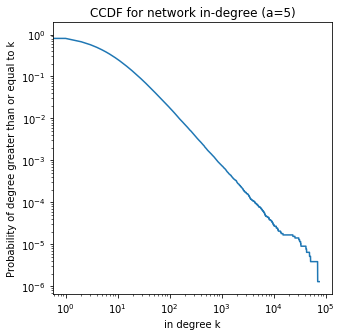

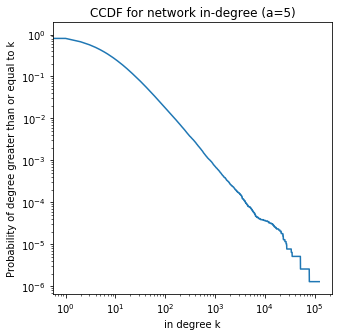

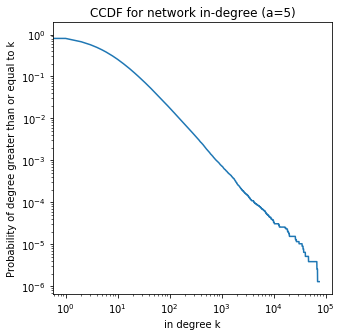

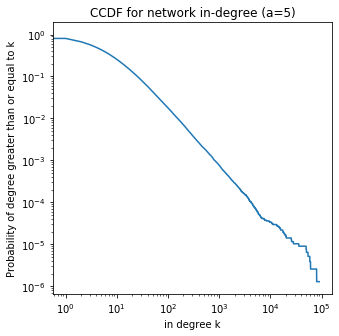

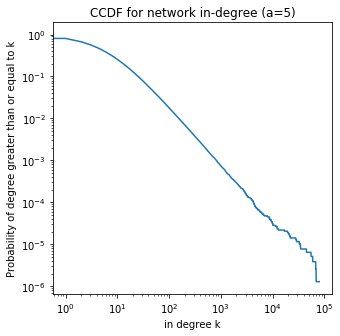

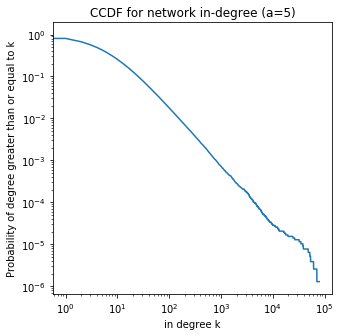

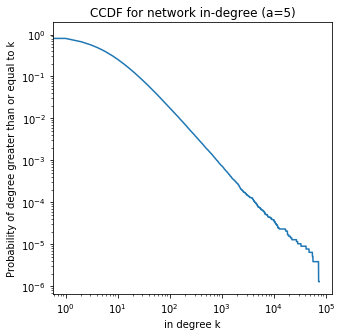

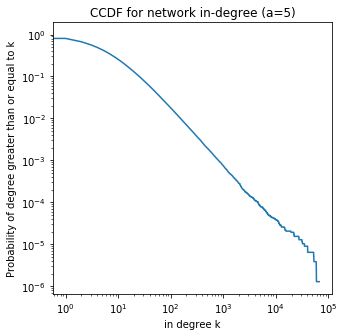

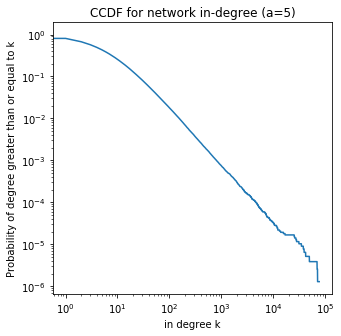

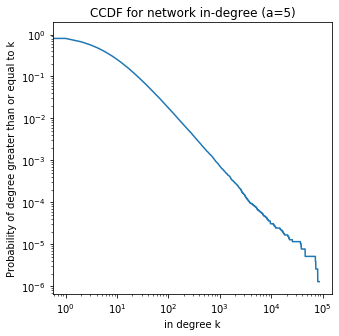

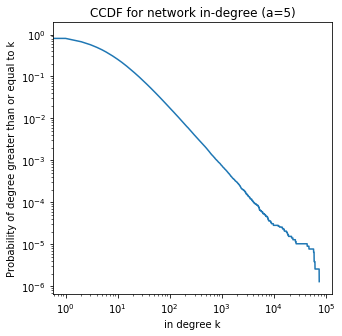

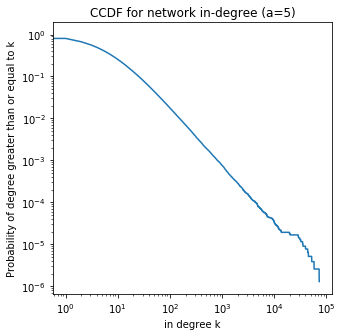

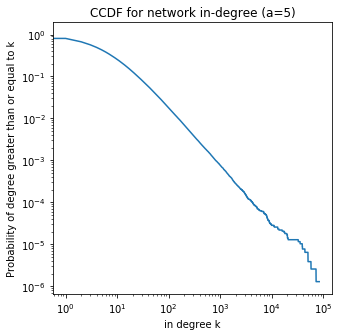

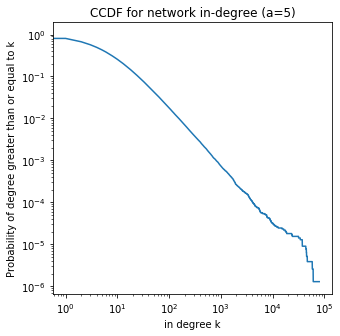

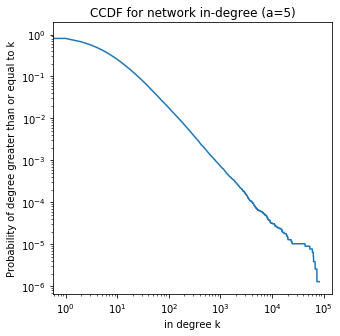

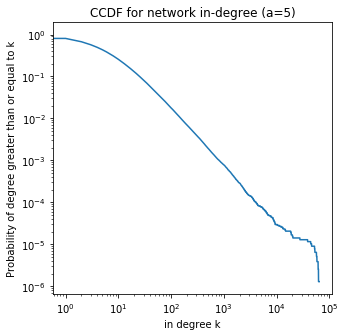

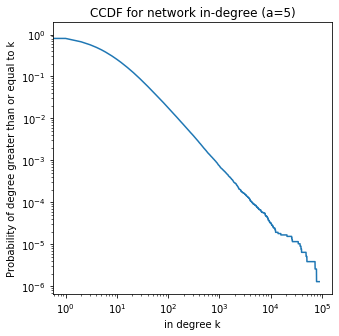

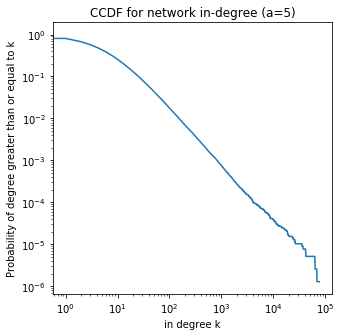

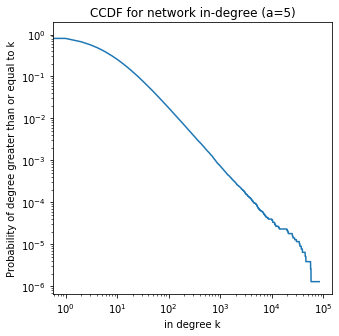

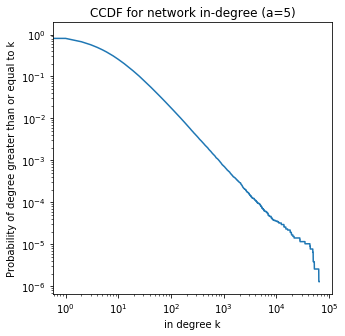

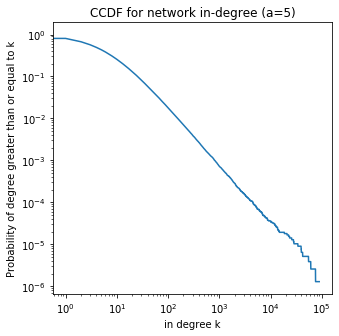

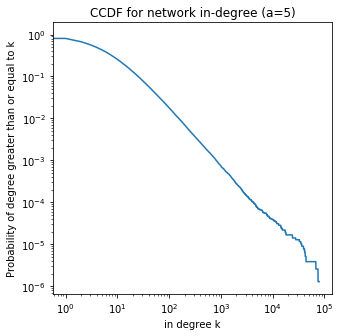

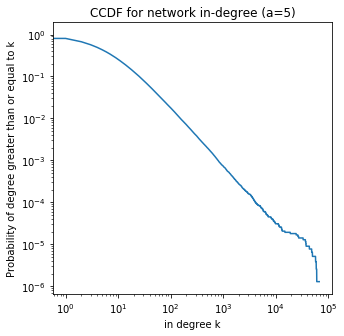

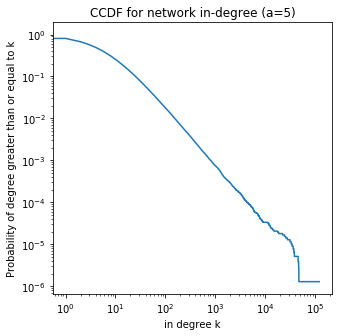

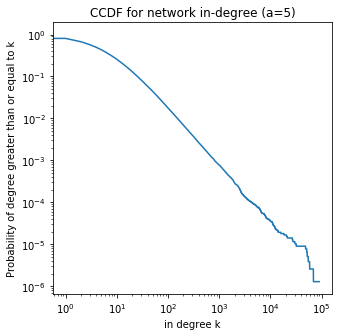

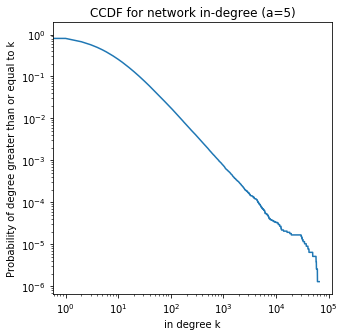

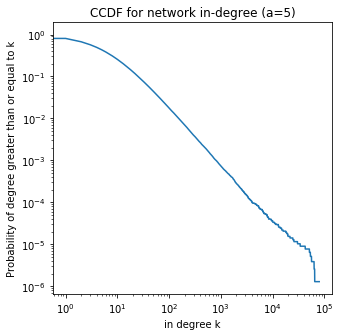

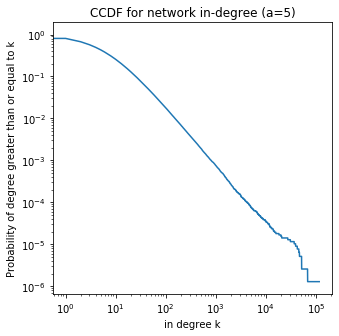

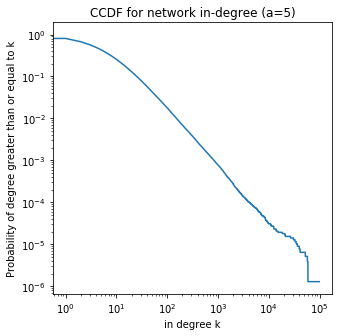

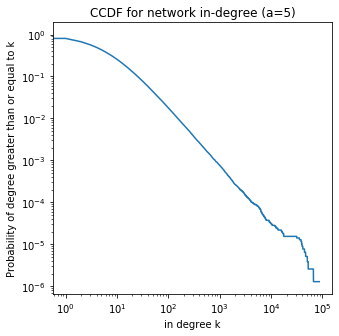

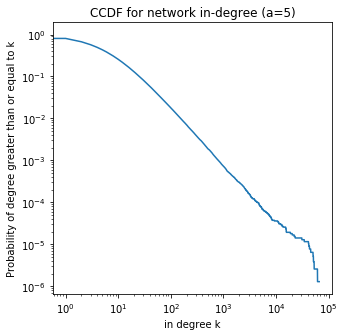

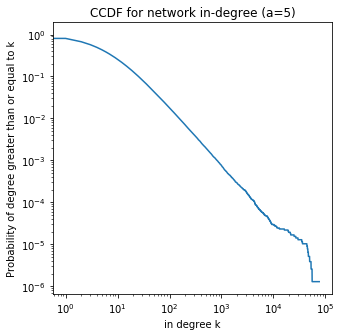

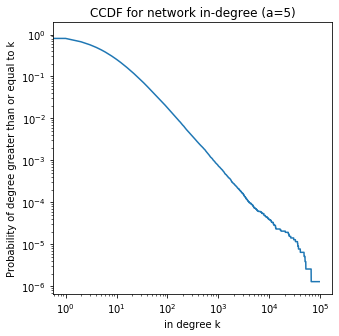

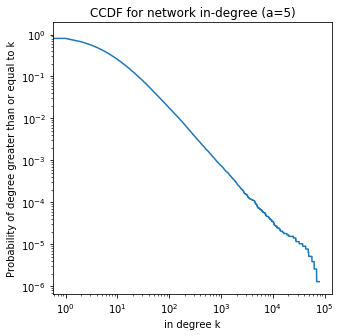

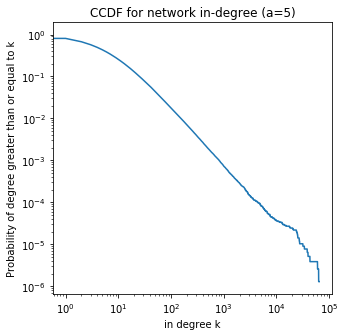

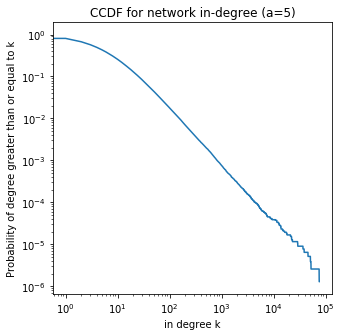

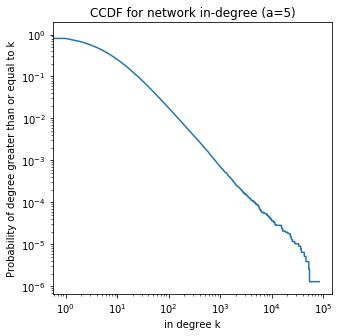

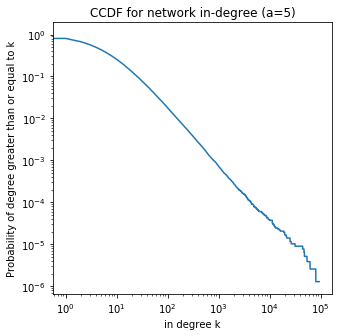

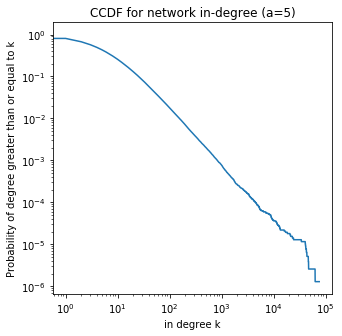

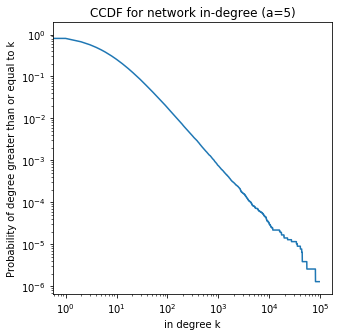

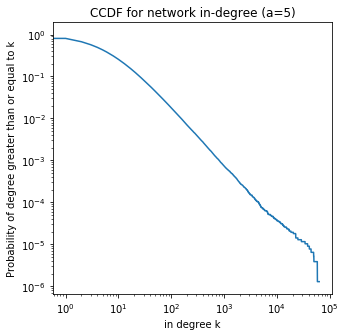

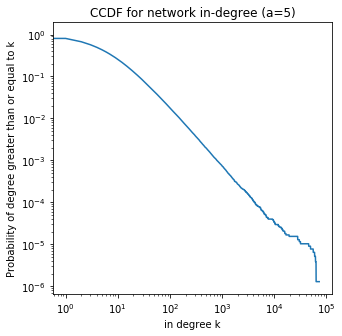

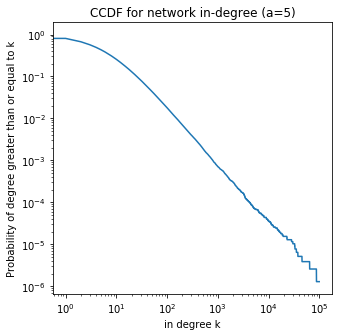

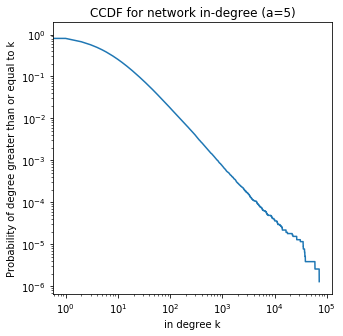

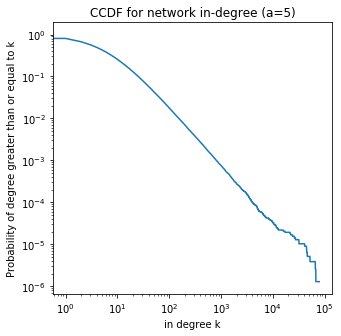

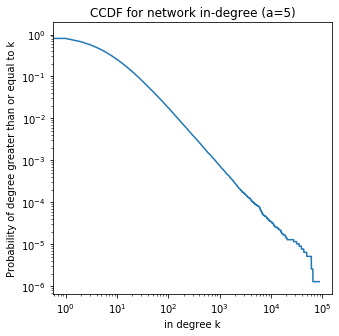

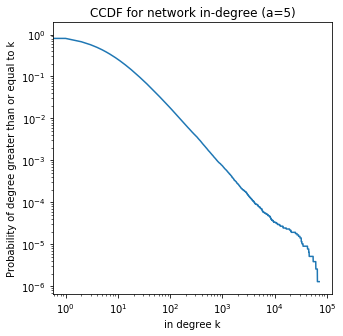

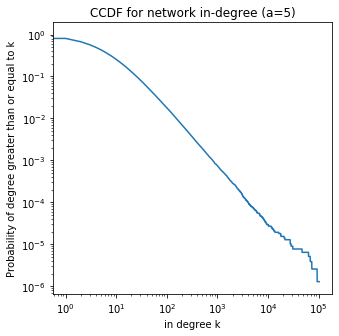

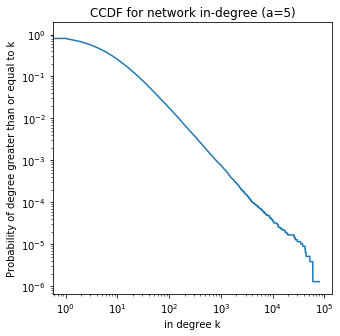

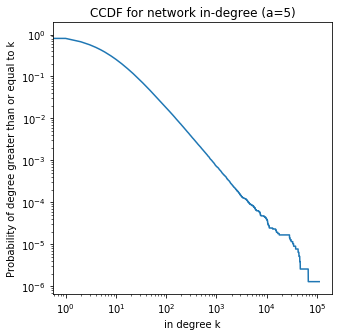

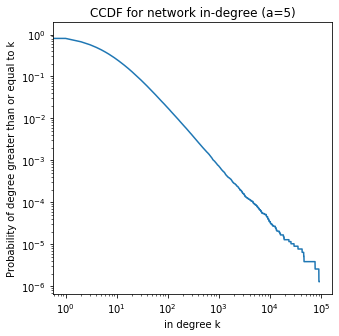

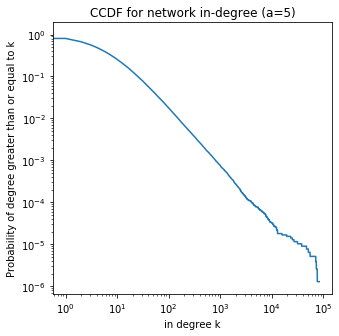

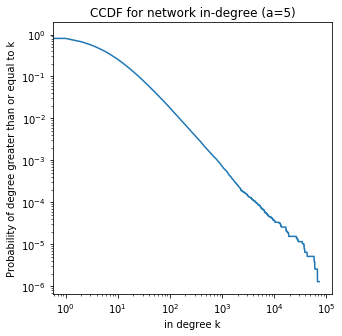

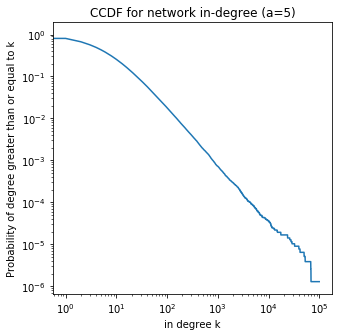

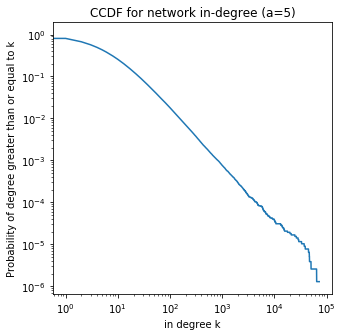

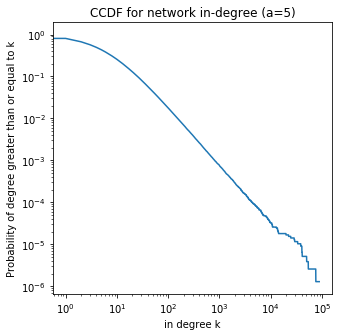

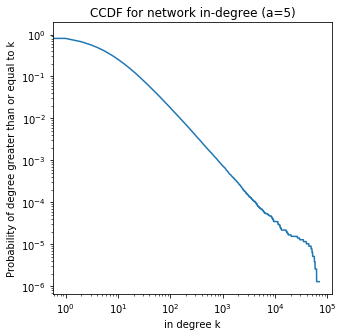

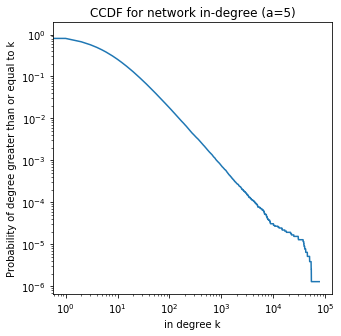

In [172]:
c = 12
n = 10**6
a = 5
iterations = 100
firstAve = []
lastAve = []
for it in range(iterations):
    targets = [0,0,1,0,2,1,3,0,2,4,
               1,4,5,6,0,1,3,4,2,4,5,6,7,0,1,4,6,8,
               0,1,3,4,6,8,9,0,2,3,6,7,2,3,6,8,9,10,
               1,3,5,6,9,11,0,2,5,6,8,10,13]
    simulationAlgorithm(n,c,a,15,targets)

    #calculate counts
    counts = [0 for i in range(n)]
    for i in targets:
        counts[i] += 1
    #calculate average of first 10%
    per = int(0.1*n)
    ave = 0
    for i in range(per):
        ave += counts[i]
    firstAve.append(ave/per)
    #calculate average of last 10%
    ave = 0
    for i in range(n-per,n):
        ave += counts[i]
    lastAve.append(ave/per)
print(sum(firstAve)/iterations)
print(sum(lastAve)/iterations)

In [181]:
#load ICON data nodes
nodes = []
nodes_timed = {}
with open("cit-HepPh-dates.txt", "r") as f:
    data = f.readline()
    data = f.readline()
    while data:
        vals = data.split("\n")[0].split("\t")
        date = datetime.fromisoformat(vals[1]).timestamp()
        nodes_timed[int(vals[0])] = date
        nodes.append(int(vals[0]))
        data = f.readline()
f.close()
print(len(nodes))
print(len(nodes_timed))

#load ICON data edges
edge_list = []
node_list = []
with open("Cit-HepPh.txt", "r") as f:
    data = f.readline()
    data = f.readline()
    data = f.readline()
    data = f.readline()
    data = f.readline()
    while data:
        vals = data.split("\n")[0].split("\t")
        v1 = int(vals[0])
        v2 = int(vals[1])
        if v1 in nodes and v2 in nodes:
            node_list.append((v1,nodes_timed[v1]))
            node_list.append((v2,nodes_timed[v2]))
            edge_list.append((v1,v2))
        data = f.readline()
f.close()
#remove duplicates from node list
#print(node_list)
print(len(node_list))
node_list = list(set(node_list))
print(len(node_list))
#sort nodes by timestamps and discard timestamps
node_list = sorted(node_list, key = lambda x: x[1])
nodes = [i[0] for i in node_list]

38557
37621
694536
30501


In [183]:
print(nodes)

[9211202, 9203201, 9203203, 9203202, 9203206, 9203207, 9203208, 9203210, 9203212, 9203211, 9203213, 9203216, 9203215, 9203217, 9203219, 9203221, 9203220, 9203222, 9203223, 9203224, 9203225, 9204203, 9204202, 9204201, 9204207, 9204206, 9204204, 9204205, 9204208, 9204210, 9204211, 9204212, 9204213, 9204214, 9204215, 9204216, 9204219, 9204220, 9204217, 9204222, 9204223, 9204224, 9204226, 9204225, 9204229, 9204228, 9204227, 9204232, 9204231, 9204234, 9204235, 9204236, 9204237, 9204238, 9204239, 9205203, 9205202, 9205201, 9205204, 9205205, 9205207, 9205208, 9205213, 9205212, 9205210, 9205209, 9205214, 9205215, 9205217, 9205220, 9205218, 9205221, 9205222, 9205224, 9205227, 9205226, 9205228, 9205229, 9205230, 9205231, 9205232, 9205236, 9205235, 9205234, 9205237, 9205233, 9205240, 9205238, 9205241, 9205242, 9205243, 9205245, 9205246, 9205247, 9206202, 9206203, 9206201, 9206204, 9206206, 9206205, 9206209, 9206208, 9206212, 9206213, 9206214, 9206217, 9206216, 9206218, 9206219, 9206221, 9206222, 

In [184]:
#create graph
G=nx.DiGraph()
G.add_edges_from(edge_list)
G.add_nodes_from(nodes)
#calculate average of first 10%
n = len(nodes)
per = int(0.1*n)
ave = 0
for i in range(per):
    index = nodes[i]
    ave += G.in_degree(index)
print(ave/per)
#calculate average of last 10%
ave = 0
for i in range(n-per,n):
    index = nodes[i]
    ave += G.in_degree(index)
print(ave/per)

21.356393442622952
1.922295081967213


In [206]:
def graphCCDFvar(targets, n):
    counts = [0 for i in range(n)]
    for i in targets:
        counts[i] += 1  
    maxC = max(counts)
    bins = [0 for i in range(maxC)]
    for c in counts:
        for i in range(c):
            bins[i] += 1
    s = max(bins)
    bins[:] = [x / s for x in bins]
    plt.plot(range(maxC),bins, label="variation")

In [207]:
#variation of Price's model
def variationAlgorithm(n, c, start, targets):
    for i in range(start,n):
        previous = []
        for j in range(c):
            #generate random number
            r = random.random()
            #pick random vertex
            vertex = random.randint(0,i-1)
            while vertex in previous:
                vertex = random.randint(0,i-1)
            #create a link and add to the target list
            targets.append(vertex)
    return targets

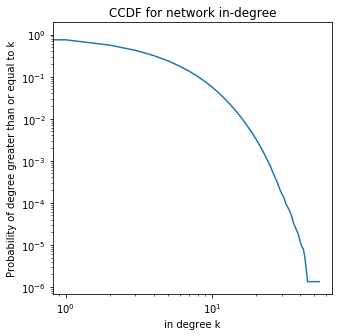

In [192]:
c = 3
n = 10**6
r = [1,2,3,4]
targets = [0,0,1,0,2,1,3,0,2,4]
variationAlgorithm(n,c,6,targets)
graphCCDF(targets, n)

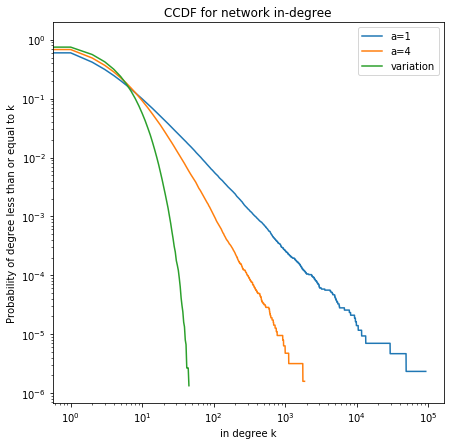

In [208]:
c = 3
n = 10**6
r = [1,4]
plt.figure(figsize=(7,7))
#simulation algorithm
for a in r:
    targets = [0,0,1,0,2,1,3,0,2,4]
    simulationAlgorithm(n,c,a,6,targets)
    graphCCDF(targets, n, a)
#algorithm variation
targets = [0,0,1,0,2,1,3,0,2,4]
variationAlgorithm(n,c,6,targets)
graphCCDFvar(targets, n)
#plot details
plt.xscale('log')
plt.yscale('log')
plt.title("CCDF for network in-degree")
plt.ylabel("Probability of degree less than or equal to k")
plt.xlabel("in degree k")
plt.legend()
plt.savefig("CCDF_var.png")